# **Instacart Market Basket EDA**

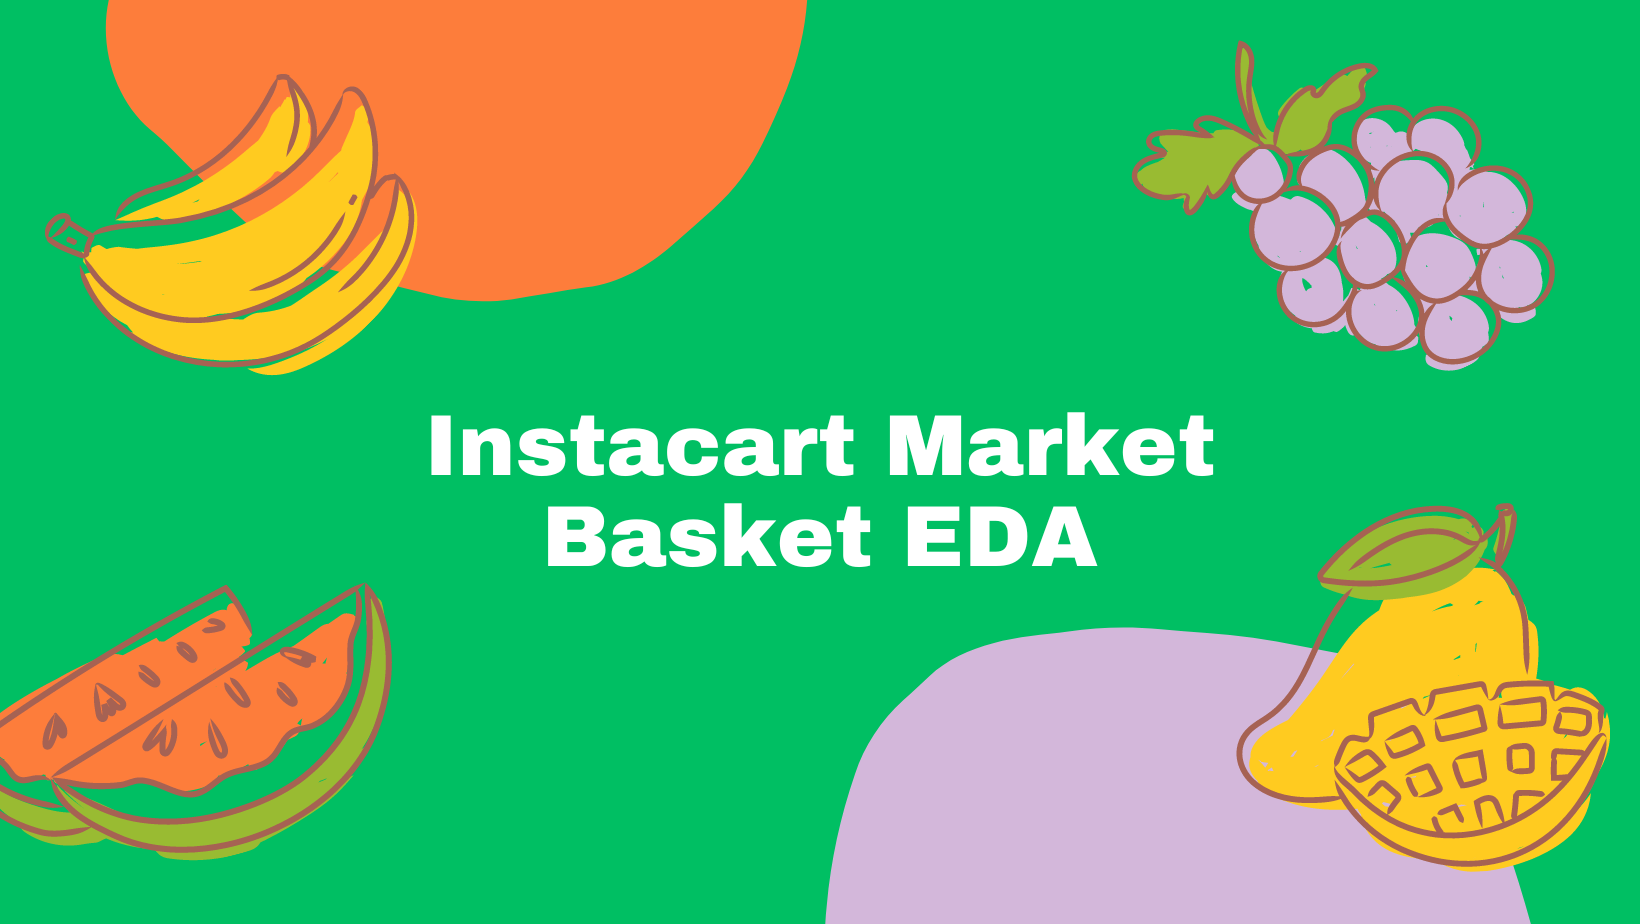

# Overview

Here we'll perform an exploratory data analysis (EDA) on a dataset of over 3 million orders made by more than 200,000 Instacart users. 

The sections in this Notebook are as follows:
1. Overview
2. Data
    *  Concatenation
    *  Merging
    *  Instacart Full Dataset 
    *  Initial Correlation Analysis
3. Products
    *  Product Drill Down
    *  Top Products
    *  Top Departments
    *  Top Aisles
    *  Probability of Reorder as a Function of Cart Position
4. User Behavior
    *  User Drill Down
    *  Distribution of Total Number of Orders by Users
    *  Distribution of Product Reordering by Users
    *  Maximum Cart Sizes
    *  Number of Orders by Day of Week
    *  Number of Orders by Hour of Day
    *  Bivariate Analysis: Number of Orders by Day of Week and Hour of Day
    *  Probability of Reorder as a Function of Order Number
5. Conclusions

The dataset used here is the Instacart Market Basket Analysis (2017) dataset [(link)](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis?select=orders.csv&sort=published).

# Data

In [1]:
# Read each table in our dataset into a dataframe
import numpy as np
import pandas as pd

products = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/products.csv')
orders = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/orders.csv')
aisles = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/aisles.csv')
departments = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/departments.csv')
order_products_train = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/order_products__train.csv')
order_products_prior = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv')

In [2]:
# The products dataset
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [3]:
print(products.info())
print(products.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
(49688, 4)


In [4]:
print('Number of missing values in products dataset: ', products.isnull().values.sum(), '\n')
print('Percentage of missing values by feature:')
products.isnull().sum() * 100 / len(products)

Number of missing values in products dataset:  0 

Percentage of missing values by feature:


product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

In [5]:
# The orders dataset
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
print(orders.info())
print(orders.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None
(3421083, 7)


In [7]:
print('Number of missing values in orders dataset: ', orders.isnull().values.sum(), '\n')
print('Percentage of missing values by feature:')
orders.isnull().sum() * 100 / len(orders)

Number of missing values in orders dataset:  206209 

Percentage of missing values by feature:


order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.027594
dtype: float64

In [8]:
# We can see that the days_since_prior_order value is NaN in our orders dataframe head
# where the order_number = 1. Let's see if this is the case for each user.
orders[orders['order_number'] == 1].isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [9]:
# This is true, so we can safely impute 0 here.
orders.fillna(value=0, inplace=True)
print('Number of missing values in orders dataset: ', orders.isnull().values.sum())

Number of missing values in orders dataset:  0


In [10]:
# The aisles dataset
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [11]:
print(aisles.info())
print(aisles.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
(134, 2)


In [12]:
print('Number of missing values in aisles dataset: ', aisles.isnull().values.sum(), '\n')
print('Percentage of missing values by feature:')
aisles.isnull().sum() * 100 / len(aisles)

Number of missing values in aisles dataset:  0 

Percentage of missing values by feature:


aisle_id    0.0
aisle       0.0
dtype: float64

In [13]:
# The departments dataset
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [14]:
print(departments.info())
print(departments.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
(21, 2)


In [15]:
print('Number of missing values in departments dataset: ', departments.isnull().values.sum(), '\n')
print('Percentage of missing values by feature:')
departments.isnull().sum() * 100 / len(departments)

Number of missing values in departments dataset:  0 

Percentage of missing values by feature:


department_id    0.0
department       0.0
dtype: float64

In [16]:
# Our order_products_prior dataset
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [17]:
print(order_products_prior.info())
print(order_products_prior.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB
None
(32434489, 4)


In [18]:
print('Number of missing values in order_products_prior dataset: ', order_products_prior.isnull().values.sum(), '\n')
print('Percentage of missing values by feature:')
order_products_prior.isnull().sum() * 100 / len(order_products_prior)

Number of missing values in order_products_prior dataset:  0 

Percentage of missing values by feature:


order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

In [19]:
# And finally our order_products_train dataset
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [20]:
print(order_products_train.info())
print(order_products_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB
None
(1384617, 4)


In [21]:
print('Number of missing values in order_products_train dataset: ', order_products_train.isnull().values.sum(), '\n')
print('Percentage of missing values by feature:')
order_products_train.isnull().sum() * 100 / len(order_products_train)

Number of missing values in order_products_train dataset:  0 

Percentage of missing values by feature:


order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

# Concatenation

We'll go ahead and concatenate our **order_products_prior** and **order_products_train** dataframes, and then merge them with our **products**, **aisles**, **departments**, and **orders** datasets into one dataframe holding all the information for our orders and users so we can explore the dependencies between variables in our data. 

In [22]:
# Concatenate our order_products_prior and order_products_train dataframes
instacart_data_full = pd.concat([order_products_prior, order_products_train]).sort_values(by=['order_id'])
print(instacart_data_full.shape)
instacart_data_full.head(10)

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
1,1,11109,2,1
0,2,33120,1,1
1,2,28985,2,1


# Merging

In [23]:
%%time
# We'll merge our dataframe with the products, aisles, and departments dataframes
instacart_data_full = pd.merge(left=instacart_data_full, right=products, on='product_id').sort_values(by=['order_id']).reset_index(drop=True)
instacart_data_full = pd.merge(left=instacart_data_full, right=aisles, on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)
instacart_data_full = pd.merge(left=instacart_data_full, right=departments, on='department_id').sort_values(by=['order_id']).reset_index(drop=True)

print(instacart_data_full.shape)
instacart_data_full.head(10)

(33819106, 9)
CPU times: user 56 s, sys: 17.7 s, total: 1min 13s
Wall time: 1min 13s


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
2,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
4,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
5,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits,produce
6,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs
7,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
8,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
9,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce


In [24]:
%%time
# And now we'll merge our dataframe with the orders dataframe
instacart_data_full = pd.merge(left=instacart_data_full, right=orders, on='order_id').sort_values(by=['order_id']).reset_index(drop=True)
print(instacart_data_full.shape)
instacart_data_full.head(10)

(33819106, 15)
CPU times: user 23.3 s, sys: 12.9 s, total: 36.1 s
Wall time: 36.1 s


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
1,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
2,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce,112108,train,4,4,10,9.0
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0
4,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
5,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits,produce,112108,train,4,4,10,9.0
6,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs,112108,train,4,4,10,9.0
7,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0
8,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
9,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [25]:
instacart_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.8+ GB


In [26]:
instacart_data_full.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [27]:
col_order = ['user_id', 'order_id', 'product_id', 'aisle_id', 'department_id', 
             'add_to_cart_order', 'reordered', 'product_name', 'aisle', 'department', 
             'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']

instacart_data_full = instacart_data_full[col_order]

We now have a very comprehensive dataset holding descriptive information about what products each user has ordered, time series data about the order and timing in which each user bought their products, as well as whether each user reordered certain products. 

This dataframe can be mined for a huge variety of different insights. 

# Instacart Full Dataset

We'll take a high level statistical overview of our full dataset.

In [28]:
instacart_data_full.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,33819106.0,1.029444e+05,59467.333955,1.0,51435.0,102626.0,154412.0,206209.0
order_id,33819106.0,1.710566e+06,987400.761933,1.0,855413.0,1710660.0,2565587.0,3421083.0
product_id,33819106.0,2.557551e+04,14097.696774,1.0,13519.0,25256.0,37935.0,49688.0
aisle_id,33819106.0,7.121799e+01,38.198982,1.0,31.0,83.0,107.0,134.0
department_id,33819106.0,9.918544e+00,6.281655,1.0,4.0,9.0,16.0,21.0
add_to_cart_order,33819106.0,8.367738e+00,7.139540,1.0,3.0,6.0,11.0,145.0
reordered,33819106.0,5.900617e-01,0.491822,0.0,0.0,1.0,1.0,1.0
order_number,33819106.0,1.713998e+01,17.498287,1.0,5.0,11.0,24.0,100.0
order_dow,33819106.0,2.737285e+00,2.093296,0.0,1.0,3.0,5.0,6.0
order_hour_of_day,33819106.0,1.343123e+01,4.246149,0.0,10.0,13.0,16.0,23.0


In [29]:
instacart_data_full.describe(include=['O']).T

,count,unique,top,freq
product_name,33819106,49685,Banana,491291
aisle,33819106,134,fresh fruits,3792661
department,33819106,21,produce,9888378
eval_set,33819106,2,prior,32434489


And we'll take a high level overview of the key features in our dataset, the distribution of users, and the distribution of our reordered class variable. 

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('dark')

[Text(0, 0, '3346083'),
 Text(0, 0, '206209'),
 Text(0, 0, '49685'),
 Text(0, 0, '134'),
 Text(0, 0, '21')]

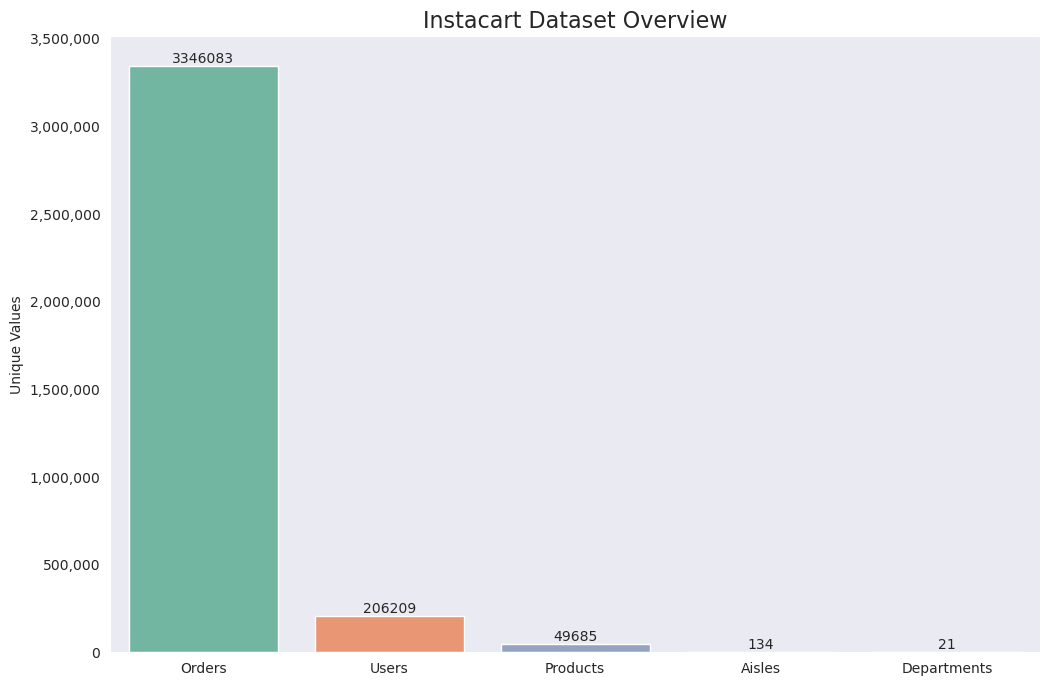

In [31]:
data = {'Orders': len(instacart_data_full.order_id.unique()),
        'Users': len(instacart_data_full.user_id.unique()),
        'Products': len(instacart_data_full.product_id.unique()),
        'Aisles': len(instacart_data_full.aisle_id.unique()),
        'Departments': len(instacart_data_full.department_id.unique())}

data = pd.DataFrame(data, index=['counts'])

# Plot
plt.figure(figsize=(12,8))
counts = sns.barplot(data=data, palette='Set2')

# Titles
counts.set_title('Instacart Dataset Overview', fontsize=16)
counts.set_ylabel('Unique Values')
plt.gca().yaxis.set_major_formatter('{x:,.0f}')
counts.bar_label(counts.containers[0], fmt='%.0f')


We can see that we have complete data for 3,346,083 orders made by a total of 206,209 users across 49,685 products, 134 aisles, and 21 departments.

In [32]:
# We'll look at the distribution of users between the prior, train, and test evaluation sets
prior = instacart_data_full.loc[instacart_data_full['eval_set'] == 'prior']['user_id'].nunique()
train = instacart_data_full.loc[instacart_data_full['eval_set'] == 'train']['user_id'].nunique()
test = orders.loc[orders['eval_set'] == 'test']['user_id'].nunique()
users_split = [prior, train, test]

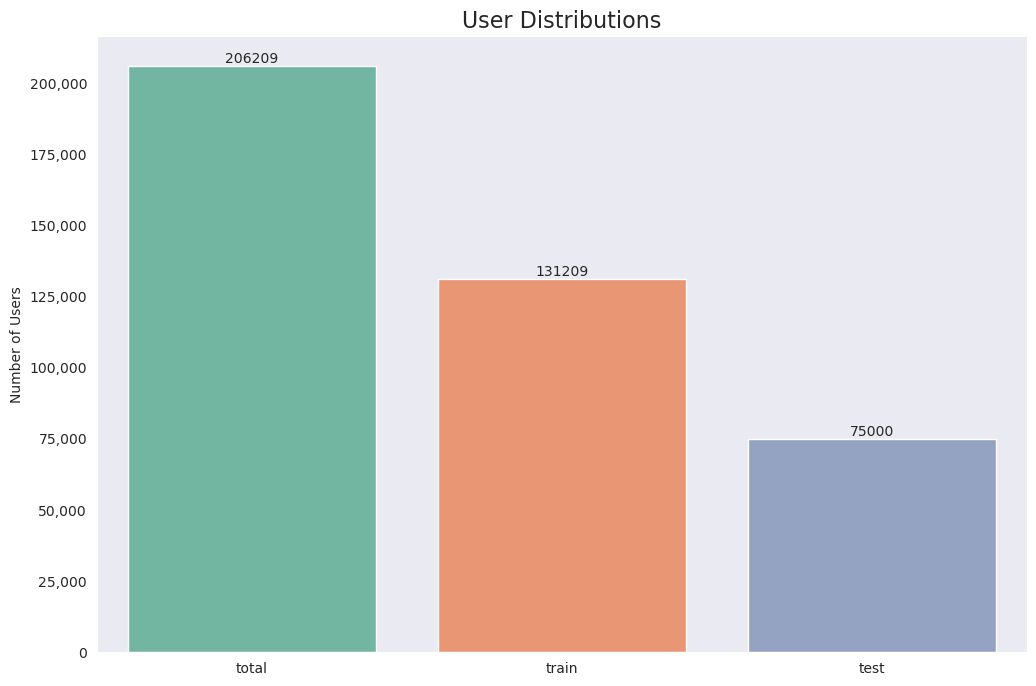

In [33]:
plt.figure(figsize=(12,8))
users = sns.barplot(x=['total', 'train', 'test'], y=users_split, palette='Set2')

# Titles
users.set_title('User Distributions', fontsize=16)
users.set_ylabel('Number of Users')
users.bar_label(users.containers[0])
plt.gca().yaxis.set_major_formatter('{x:,.0f}')

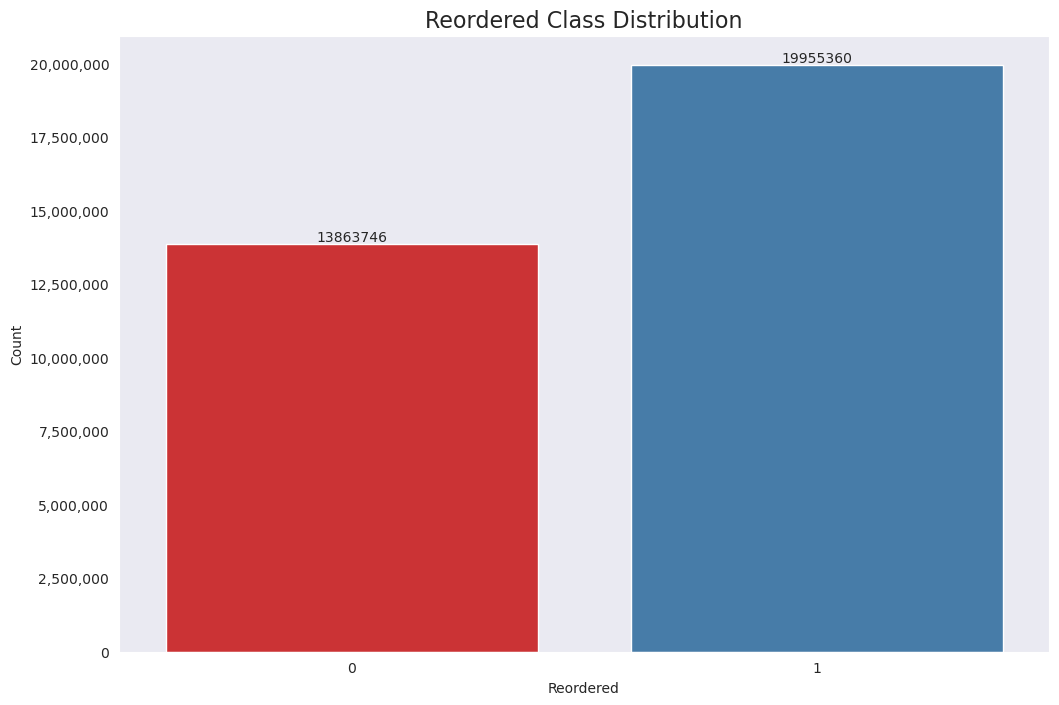

In [34]:
# Visualize our reordered class distribution
reord_class_distr = instacart_data_full['reordered'].value_counts()

# Plot
plt.figure(figsize=(12,8))
rcd = sns.barplot(x=reord_class_distr.index, y=reord_class_distr.values, palette='Set1')

# Titles
rcd.set_title('Reordered Class Distribution', fontsize=16)
rcd.set_ylabel('Count')
rcd.set_xlabel('Reordered')
rcd.bar_label(rcd.containers[0], fmt='%.0f')
plt.gca().yaxis.set_major_formatter('{x:,.0f}')

In [35]:
# Ratio of reordered to not reordered
print(f'Reorder ratio:  {reord_class_distr.values[0] / reord_class_distr.values[1]:.3f}')
print(f'Global reorder probability:  {reord_class_distr.values[1] / (reord_class_distr.values[0] + reord_class_distr.values[1]):.3f}')

Reorder ratio:  1.439
Global reorder probability:  0.410


# Initial Correlation Analysis

Text(0.5, 1.0, 'Instacart Correlation Matrix')

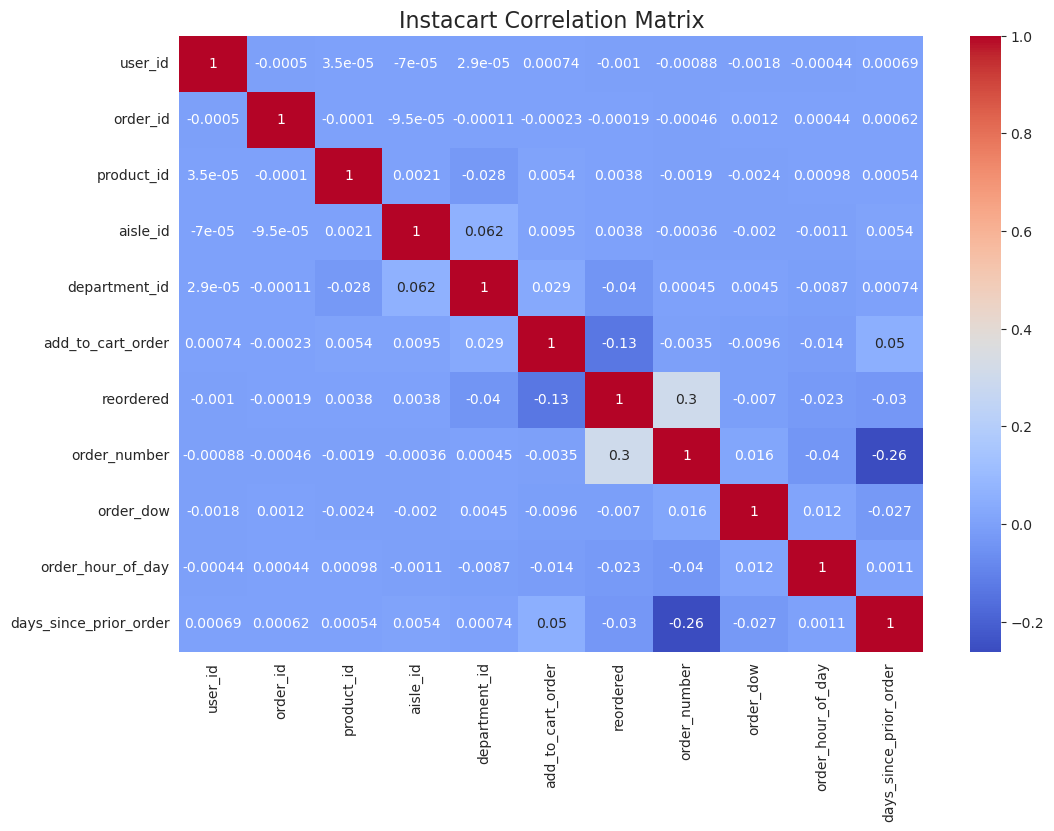

In [36]:
corr_matrix = instacart_data_full.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=corr_matrix, cmap='coolwarm', annot=True)
plt.title('Instacart Correlation Matrix', fontsize=16)

In [37]:
corr_matrix['reordered']

user_id                  -0.001001
order_id                 -0.000187
product_id                0.003833
aisle_id                  0.003759
department_id            -0.039827
add_to_cart_order        -0.133536
reordered                 1.000000
order_number              0.303610
order_dow                -0.006952
order_hour_of_day        -0.023051
days_since_prior_order   -0.030025
Name: reordered, dtype: float64

**We can see from our simple correlation analysis that the feature add_to_cart_order has a very slight negative correlation with our reordered class (r = -0.1335).** This means that as the order in which a product is placed in the cart increases, our reordered variable tends to decrease in value. This might mean that a user is more likely to place products they will reorder in their cart first (i.e. that they are familiar with, already know that they like, or are searching for specifically), and then place less desirable or unique products in their cart after this. However, with our raw data here, it's important to note that this negative correlation is small. 

**We can also see that order_number has a slight positive correlation with our reordered class (r = 0.3036).** This means that as the number of orders a user places increases, our reordered variable tends to increase in value. This might mean that as a user places orders and learns which products they like, they're more likely to reorder products that they've had positive experiences with. 

Interestingly enough, our order_number and days_since_prior_order features have a slight negative correlation (r = -0.26). This means that as the number of orders a user makes increases, the number of days since their last order tends to decrease.

One important thing to note here is that with our raw data we don't see any significant correlations between numerical features and our reordered class. For modeling we would need to engineer features that describe our users, products, user x product interactions, and functions of time within the dataset in order to generate knowledge that we could use to build predictive power.

In [38]:
import gc
gc.collect()

46

# **Products**

# Product Drill Down

Here we'll define a function that drills down into a specific product's data and calculates product features and analyses. Our function will support random sampling as well as targeted product name specification. 

For each product drill down we will calculate 6 product features and 6 product analyses:

**Product Features:**
1. total_orders:  total number of times product was ordered
2. total_reorders:  total number of times product was reordered
3. avg_position_in_cart:  average cart position of product across all orders
4. global_prod_avg_time_btwn_orders:  average time between orders for product across all orders
5. reorder_ratio:  ratio between n reordered : n not reordered for product
6. reorder_probability: probability of reorder for product, where: 
    
    $ P(Reordered) = \frac{\text{n product reordered } }{\text{n product not reordered + n product reordered}} $

**Product Analyses:**
1. Number of Orders vs. Cart Position

2. Average Time Between Orders vs. Order Number
3. Product Reorder Rate

4. Number of Orders vs. Day of Week

5. Number of Orders vs. Hour of Day

6. Number of Orders vs. Top Users

Randomly sampling products allows us to explore the variation in product x user interactions within our dataset, as well as specific patterns that underlie the statistical relationships of features in our dataset.

In [39]:
def product_drill_down(p=None):
    """
    Randomly samples or selects an input product name and calculates features and analyses for that product.
    
    Product Features:
    total_orders:  total number of times product was ordered
    total_reorders:  total number of times product was reordered
    avg_position_in_cart:  average cart position of product
    global_prod_avg_time_btwn_orders:  average time between orders for product
    reorder_ratio:  ratio between n reordered : n not reordered for product
    reorder_probability: probability of reorder for product
    
    Product Analyses:
    Number of Orders vs. Cart Position
    Average Time Between Orders vs. Order Number
    Product Reorder Rate
    Number of Orders vs. Day of Week
    Number of Orders vs. Hour of Day
    Number of Orders vs. Top Users
    """
    if p == None:
        # Select a random product from our dataset
        prods = instacart_data_full['product_name'].unique()
        p = np.random.choice(prods)

    # Extract descriptive data about our product
    prod_df = instacart_data_full.loc[instacart_data_full['product_name'] == p]
    
    # Product analyses
    dist_cart_position = prod_df.groupby('add_to_cart_order')['add_to_cart_order'].count()
    avg_time_btwn_orders = prod_df.groupby('order_number')['days_since_prior_order'].mean()
    reorder_rate = prod_df.groupby('reordered')['reordered'].count()
    prod_dow = prod_df.groupby('order_dow').order_dow.count()
    prod_hod = prod_df.groupby('order_hour_of_day').order_hour_of_day.count()
    top_users = prod_df.groupby('user_id')['user_id'].count().sort_values(ascending=False)[:5]

    # Product features
    total_orders = prod_df.groupby('order_id')['order_id'].count().sum()
    total_reorders = reorder_rate.values[1]
    avg_position_in_cart = prod_df['add_to_cart_order'].mean()
    global_prod_avg_time_btwn_orders = prod_df['days_since_prior_order'].mean()
    reorder_ratio = reorder_rate.values[1] / reorder_rate.values[0]
    reorder_probability = reorder_rate.values[1] / (reorder_rate.values[0] + reorder_rate.values[1])

    prod_dict = {'Total Orders': total_orders, 'Total Reorders': total_reorders, 'Average Position in Cart': avg_position_in_cart,
                'Average Time Between Orders': global_prod_avg_time_btwn_orders, 'Reorder Ratio': reorder_ratio, 'Reorder Probability': reorder_probability}

    prod_features = pd.DataFrame(prod_dict, index=[f'{p}'])
    print('-'*10, f'{p} Product Profile', '-'*10)
    print(prod_features.T, '\n')

    # Construct our figure and subplots
    fig, axs = plt.subplots(3, 2, figsize=(12, 10), gridspec_kw=dict(width_ratios=[1, 1]))

    # Plot each analysis
    prod_cart_pos_dist = sns.barplot(x=dist_cart_position.index, y=dist_cart_position.values, ax=axs[0,0])
    prod_avg_time_btwn_orders = sns.barplot(x=avg_time_btwn_orders.index, y=avg_time_btwn_orders.values, ax=axs[1,0])
    prod_reorder_rate = sns.barplot(x=reorder_rate.index, y=reorder_rate.values, ax=axs[2,0])
    prod_days = sns.barplot(x=prod_dow.index,  y=prod_dow.values, ax=axs[0,1])
    prod_hours = sns.barplot(x=prod_hod.index, y=prod_hod.values, ax=axs[1,1])
    prod_top_users = sns.barplot(x=top_users.index, y=top_users.values, ax=axs[2,1])

    # Titles for each subplot
    fig.suptitle(f'{p} Product Profile', fontsize=16)
    axs[0,0].set_title("Number of Orders vs. Position in Cart")
    axs[0,0].set_ylabel("Number of Orders")
    axs[0,0].set_xlabel("Position in Cart")

    axs[1,0].set_title("Average Time Between Orders vs. Order Number")
    axs[1,0].set_ylabel("Average Time Between Orders")
    axs[1,0].set_xlabel("Order Number")

    axs[2,0].set_title("Product Reorder Rate")
    axs[2,0].set_ylabel("Count")
    axs[2,0].set_xlabel("Reordered")

    axs[0,1].set_title("Number of Orders vs. Day of Week")
    axs[0,1].set_ylabel("Number of Orders")
    axs[0,1].set_xlabel("Day of Week")

    axs[1,1].set_title("Number of Orders vs. Hour of Day")
    axs[1,1].set_ylabel("Number of Orders")
    axs[1,1].set_xlabel("Hour of Day")

    axs[2,1].set_title("Number of Orders vs. Top Users")
    axs[2,1].set_ylabel("Number of Orders")
    axs[2,1].set_xlabel("User ID")

    fig.tight_layout()
    fig.subplots_adjust(top=0.88)
    plt.show()

---------- Mint Dark Chocolate Candy Product Profile ----------
                             Mint Dark Chocolate Candy
Total Orders                                 59.000000
Total Reorders                               23.000000
Average Position in Cart                      8.338983
Average Time Between Orders                  10.186441
Reorder Ratio                                 0.638889
Reorder Probability                           0.389831 



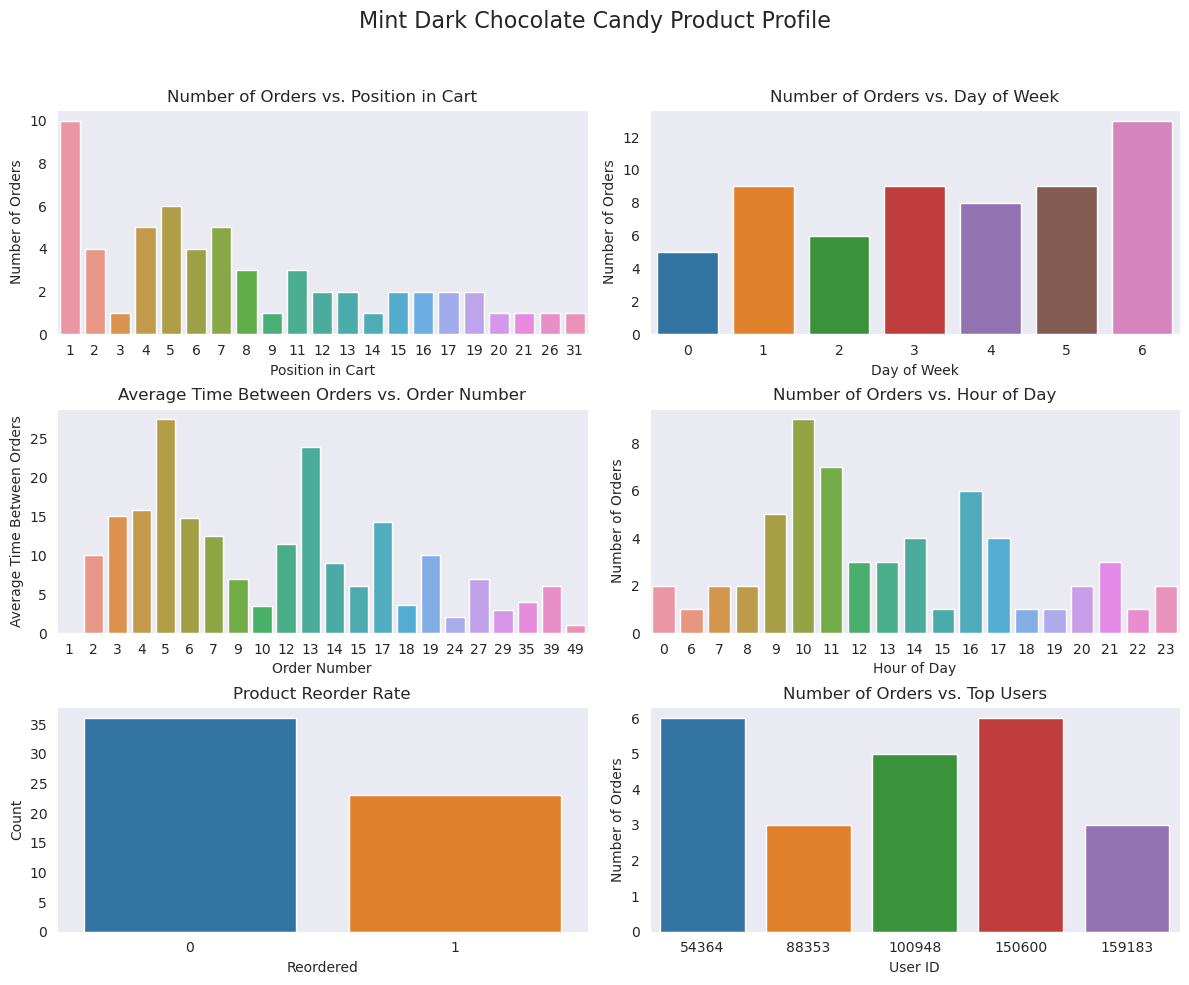

In [40]:
product_drill_down()

---------- 2013 Zinfandel Red Wine Product Profile ----------
                             2013 Zinfandel Red Wine
Total Orders                               35.000000
Total Reorders                             21.000000
Average Position in Cart                    4.428571
Average Time Between Orders                 7.657143
Reorder Ratio                               1.500000
Reorder Probability                         0.600000 



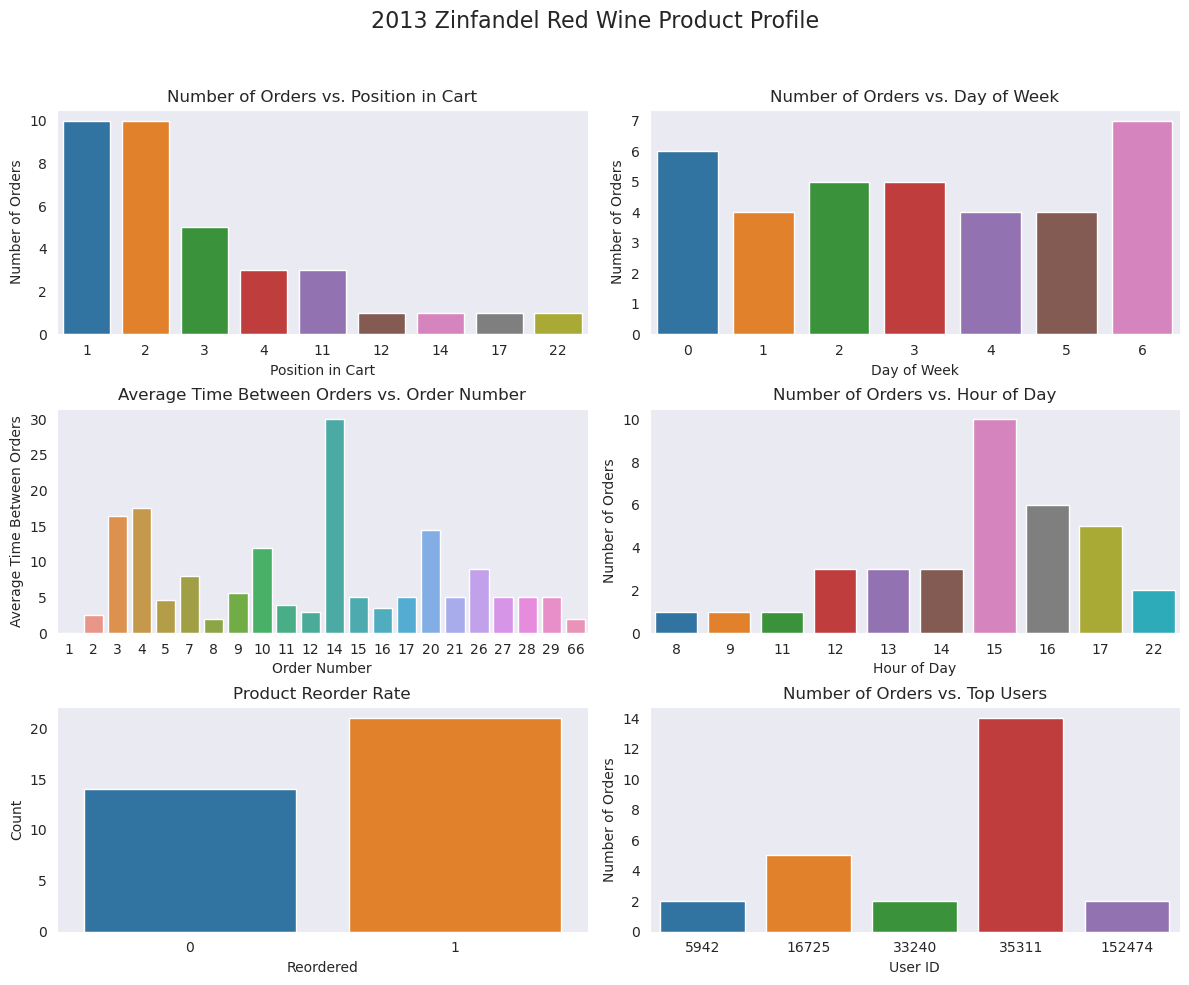

In [76]:
product_drill_down('2013 Zinfandel Red Wine')

---------- Japaleno Green Salsa Hot Product Profile ----------
                             Japaleno Green Salsa Hot
Total Orders                               109.000000
Total Reorders                              29.000000
Average Position in Cart                     8.724771
Average Time Between Orders                 12.376147
Reorder Ratio                                0.362500
Reorder Probability                          0.266055 



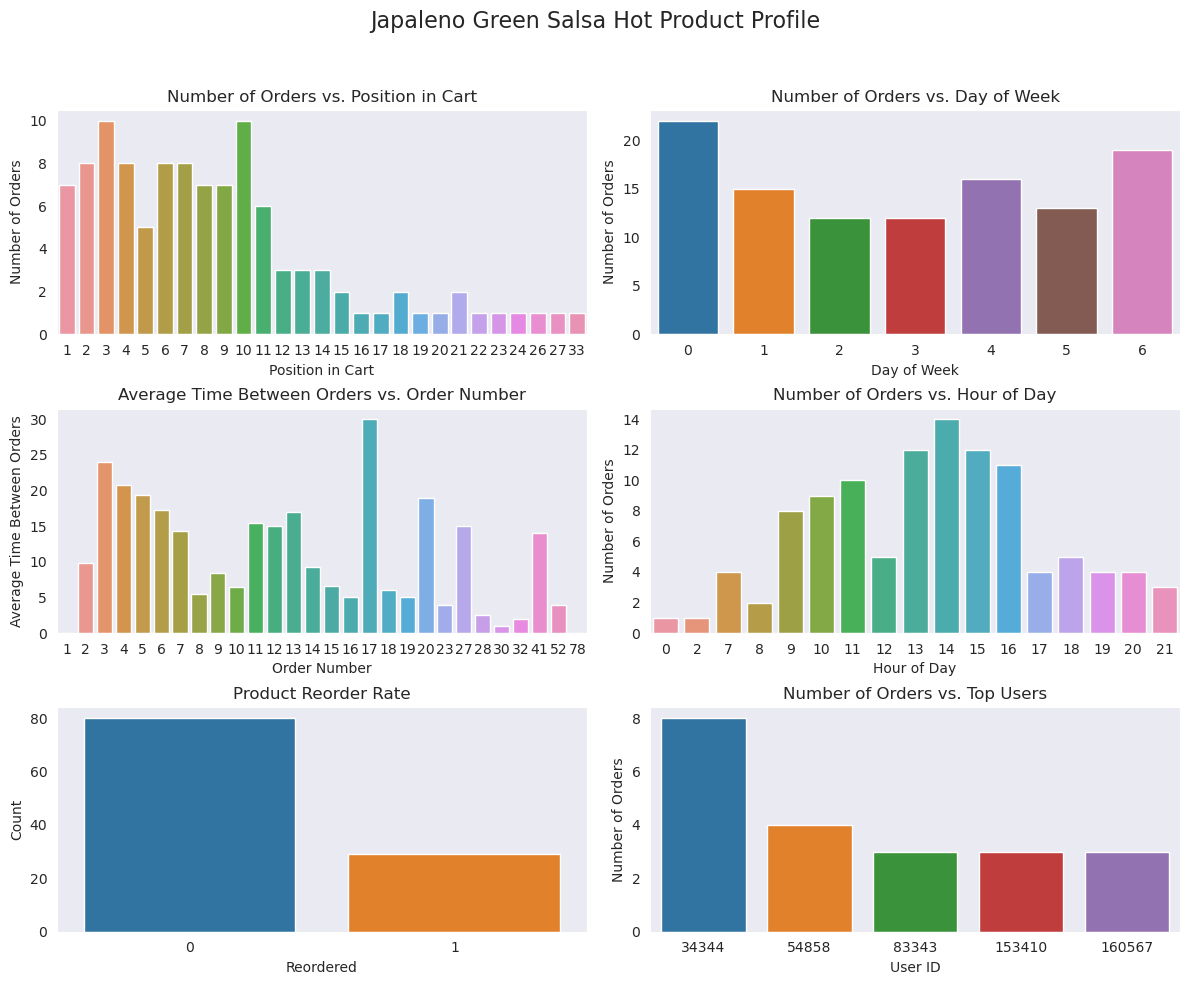

In [42]:
product_drill_down('Japaleno Green Salsa Hot')

# Top Products

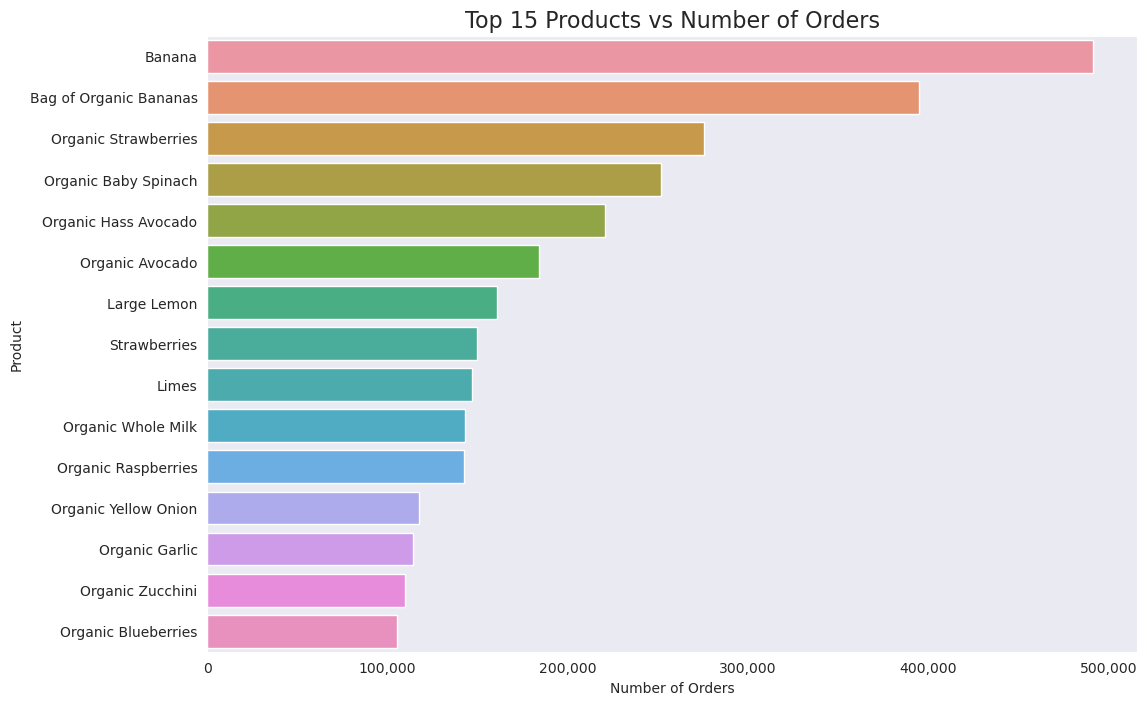

In [43]:
# We'll look at the top 15 products that were most ordered in our dataset.
top_prods = instacart_data_full.groupby('product_name')['product_name'].count().sort_values(ascending=False)[0:15]

plt.figure(figsize=(12,8))
prod_counts = sns.barplot(x=top_prods.values, y=top_prods.index)

# Titles
prod_counts.set_title('Top 15 Products vs Number of Orders', fontsize=16)
prod_counts.set_ylabel('Product')
prod_counts.set_xlabel('Number of Orders')
plt.gca().xaxis.set_major_formatter('{x:,.0f}')

# Top Departments

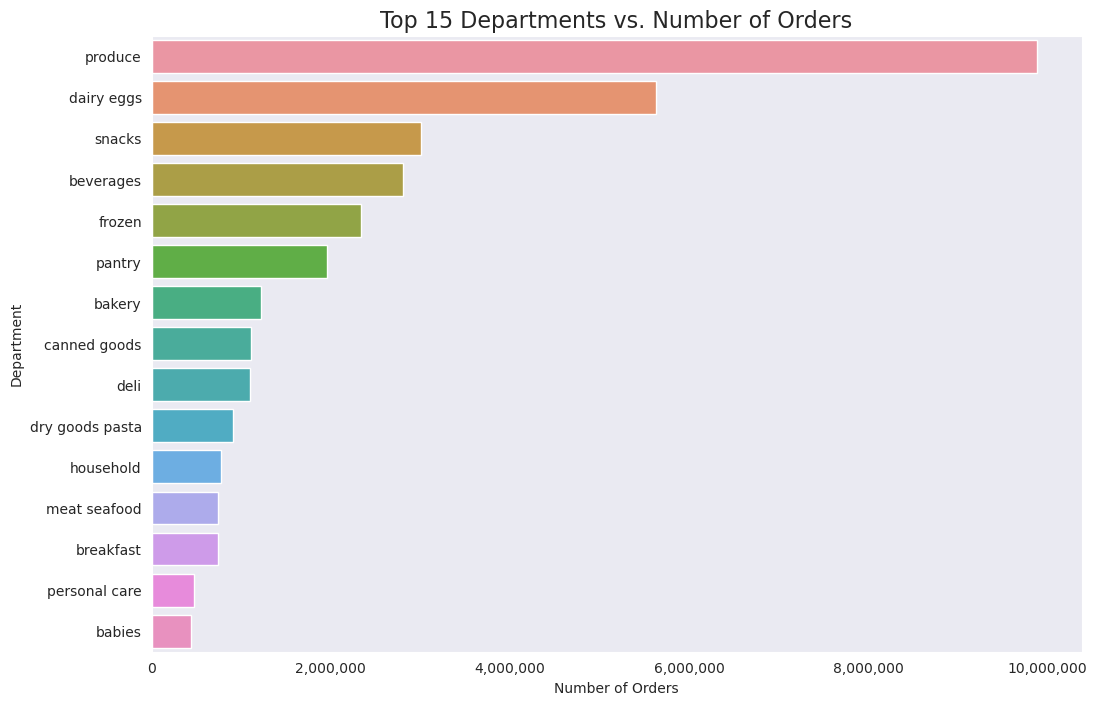

In [44]:
# Top 15 departments that garnered the most orders.
top_deps = instacart_data_full.groupby('department')['department'].count().sort_values(ascending=False)[0:15]

plt.figure(figsize=(12,8))
dep_counts = sns.barplot(x=top_deps.values, y=top_deps.index)

# Titles
dep_counts.set_title('Top 15 Departments vs. Number of Orders', fontsize=16)
dep_counts.set_ylabel('Department')
dep_counts.set_xlabel('Number of Orders')
plt.gca().xaxis.set_major_formatter('{x:,.0f}')

# Top Aisles

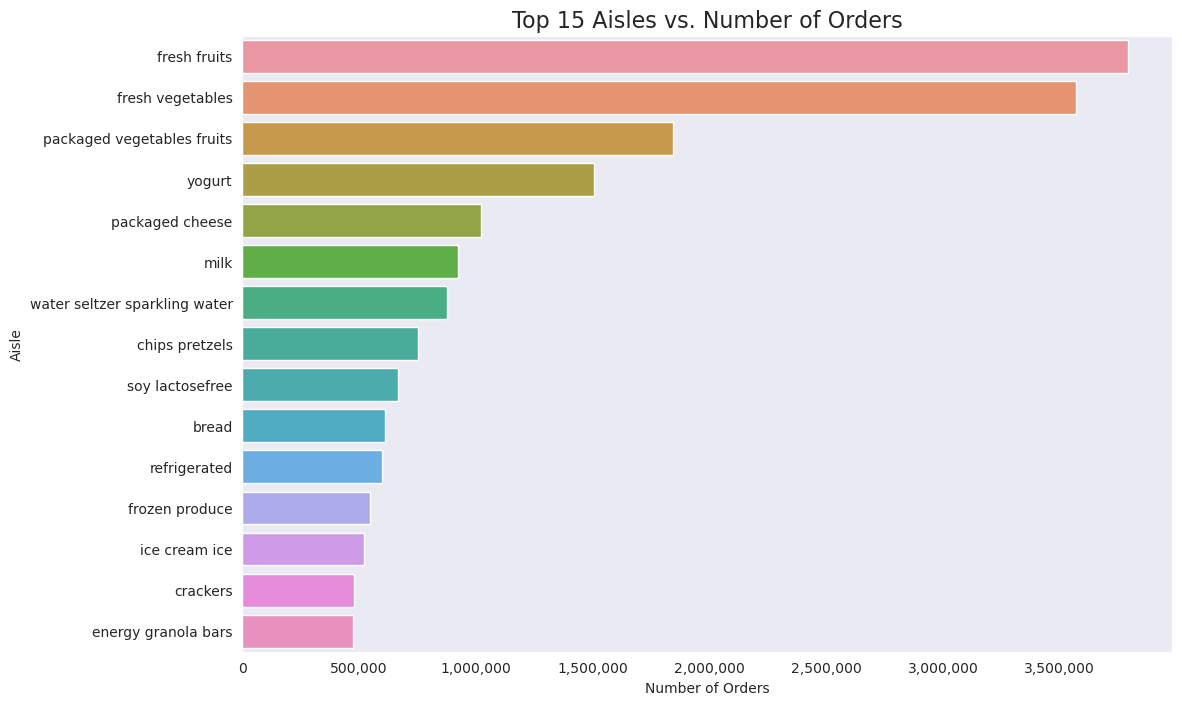

In [45]:
# As well as the top 15 aisles that were ordered from in our dataset.
top_aisles = instacart_data_full.groupby('aisle')['aisle'].count().sort_values(ascending=False)[0:15]

plt.figure(figsize=(12,8))
dep_counts = sns.barplot(x=top_aisles.values, y=top_aisles.index)

# Titles
dep_counts.set_title('Top 15 Aisles vs. Number of Orders', fontsize=16)
dep_counts.set_ylabel('Aisle')
dep_counts.set_xlabel('Number of Orders')
plt.gca().xaxis.set_major_formatter('{x:,.0f}')

# Probability of Reorder as a Function of Cart Position

Here we'll look at the relationship between a product's cart position and the probability that a user will reorder that product, where:

$ P(Reordered) = \frac{\text{n add_to_cart_order reordered } }{\text{n add_to_cart_order not reordered + n add_to_cart_order reordered}} $

Recall that our add_to_cart_order feature has a very slight negative correlation with our reordered class (**r = -0.1335**), which suggests that as a product's position in a user's cart increases, its probability of being a reordered product might decrease. 

In [46]:
cart_pos_reord_probability = instacart_data_full.groupby(['add_to_cart_order', 'reordered'])['reordered'].count().groupby(level=0).apply(lambda x: x / float(x.sum())).reset_index(name='cart_pos_reorder_probability')
cart_pos_reord_probability

,add_to_cart_order,reordered,cart_pos_reorder_probability
0,1,0,0.320698
1,1,1,0.679302
2,2,0,0.322865
3,2,1,0.677135
4,3,0,0.341574
...,...,...,...
274,141,0,1.000000
275,142,0,1.000000
276,143,0,1.000000
277,144,0,1.000000


Text(0.5, 0, 'Add To Cart Order')

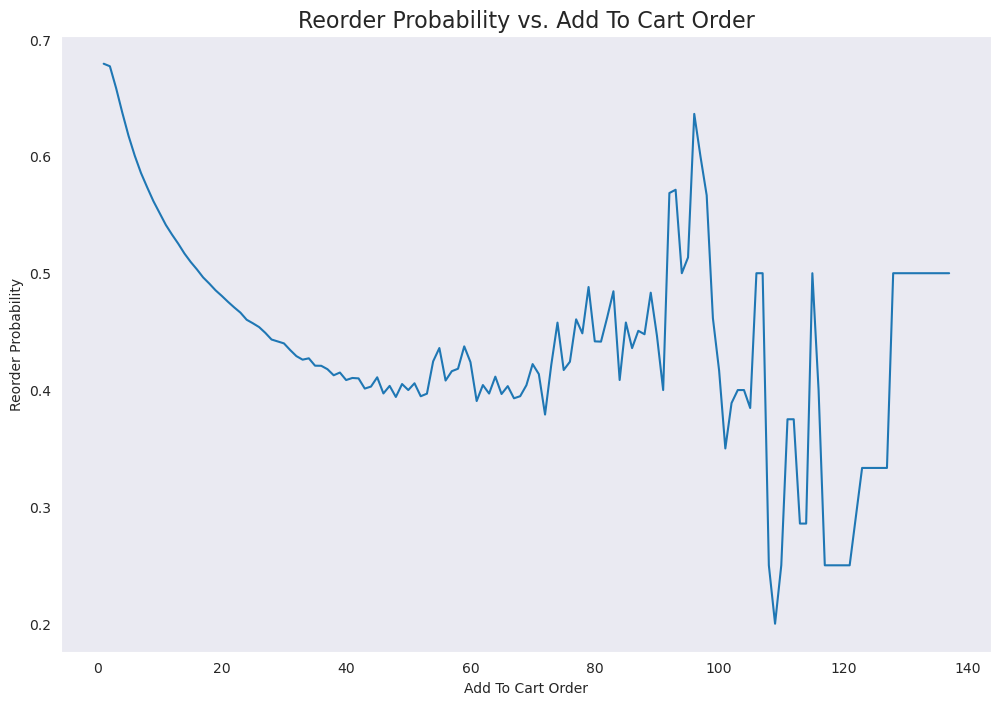

In [47]:
# Reorder Probability vs. Cart Position
cart_pos_reord_probability = cart_pos_reord_probability[cart_pos_reord_probability['reordered'] == 1]

# Plot
plt.figure(figsize=(12,8))
sns.lineplot(data=cart_pos_reord_probability, x='add_to_cart_order', y='cart_pos_reorder_probability')

# Titles
plt.title('Reorder Probability vs. Add To Cart Order', fontsize=16)
plt.ylabel('Reorder Probability')
plt.xlabel('Add To Cart Order')

**We can see that between the cart positions 1 and 50 our product reorder probability decreases steadily as a product's cart position increases. Around cart position 70, we see chaotic behavior in our reorder probability!**

This chaos in our reorder probability could be due to users adding products that they've already ordered before into their cart in different positions across different orders. The contents and product positions of an order clearly depend on a multitude of external factors not accounted for within our dataset, that are deeply nonlinear - not only do users come into Instacart with specific goals and motivations that themselves vary as functions of time (i.e. internal physiological variables and external environmental variables), their behavior can directly be influenced by stimuli and experiences presented to them within the user interface. 

It's important to note that we do see rough symmetry between cart positions 90 and 110, and it appears that at cart position 130 our reorder probability becomes constant at 0.5. 

# **User Behavior**

# User Drill Down

Here we'll define a function that drills down into a specific user's data and calculates user specific features and behavioral analyses. Our function will support random sampling as well as targeted user ID specification. 

For each user drill down we will calculate 8 user features and 8 analyses:

**User Features:**
1. user_max_orders:  total number of orders made by user
2. user_total_prods:  total number of products ordered by user
3. user_top_prod:  most ordered product
4. total_reordered:  total number of reordered products
5. avg_cart_size:  average cart size for user
6. avg_time_btwn_orders:  average time between orders made by user
7. reorder_ratio:  ratio between n products reordered : n products not reordered for user
8. reorder_probability: probability of reorder for user, where: 
    
    $ P(Reordered) = \frac{\text{n products reordered } }{\text{n products not reordered + n products reordered}} $

**User Analyses:**
1. Top 10 Products vs. Number of Orders

2. Top 10 Departments vs. Number of Orders

3. Top 10 Aisles vs. Number of Orders
4. Number of Products Reordered
5. Number of Products Ordered vs. Day of Week
6. Number of Products Ordered vs. Hour of Day
7. Number of Products vs. Order Number
8. Days Since Prior Order vs. Order Number

Randomly sampling users allows us to explore the variation in user behavior within our dataset, as well as specific behavioral patterns that underlie the statistical relationships between features in our data. 

In [48]:
def user_drill_down(u=None):
    """
    Randomly samples or selects an input user ID and calculates features and analyses for that user.
    
    User Features:
    user_max_orders:  total number of orders made
    user_total_prods:  total number of products ordered
    user_top_prod:  most ordered product
    total_reordered:  total number of reordered products
    avg_cart_size:  average cart size for user
    avg_time_btwn_orders:  average time between orders
    reorder_ratio:  ratio between n reordered : n not reordered for user
    reorder_probability: probability of reorder for user
    
    User Analyses:
    Top 10 Products vs. Number of Orders
    Top 10 Departments vs. Number of Orders
    Top 10 Aisles vs. Number of Orders
    Number of Products Reordered
    Number of Products Ordered vs. Day of Week
    Number of Products Ordered vs. Hour of Day
    Number of Products vs. Order Number
    Days Since Prior Order vs. Order Number
    """
    if u == None:
        # Select a random user from our dataset
        users = instacart_data_full['user_id'].unique()
        u = np.random.choice(users)

    # Extract descriptive data about our user 
    user_df = instacart_data_full.loc[instacart_data_full['user_id'] == u]
    
    # User analyses
    user_top_prods = user_df.groupby('product_name')['product_name'].count().sort_values(ascending=False)[0:10]
    user_top_deps = user_df.groupby('department')['department'].count().sort_values(ascending=False)[0:10]
    user_top_aisles = user_df.groupby('aisle')['aisle'].count().sort_values(ascending=False)[0:10]
    user_dow = user_df.groupby('order_dow').order_dow.count()
    user_hod = user_df.groupby('order_hour_of_day').order_hour_of_day.count()
    order_number_vs_days_since_prior_order = user_df.groupby('order_number')['days_since_prior_order'].unique().reset_index(name='days_since_prior_order').sort_values(by='order_number')
    num_products_per_order = user_df.groupby('order_number')['add_to_cart_order'].max()
    reorder_rate = user_df.groupby('reordered')['reordered'].count()

    # User features
    user_max_orders = user_df['order_number'].max()
    user_total_prods = user_df.groupby('product_name')['product_name'].count().sum()
    user_top_prod = user_top_prods.index[0]
    total_reordered = reorder_rate.values[1]
    avg_cart_size = user_df.groupby('order_number')['add_to_cart_order'].max().mean()
    avg_time_btwn_orders = user_df.groupby('order_number')['days_since_prior_order'].unique().mean()[0]
    reorder_probability = reorder_rate.values[1] / (reorder_rate.values[0] + reorder_rate.values[1])
    reorder_ratio = reorder_rate.values[1] / reorder_rate.values[0]

    user_dict = {'Total Orders Made': user_max_orders, 'Total Number of Products Ordered': user_total_prods,
                'Total Number of Reordered Products': total_reordered, 'Top Product Ordered': user_top_prod, 
                'Average Cart Size': avg_cart_size, 'Average Time Between Orders': avg_time_btwn_orders,
                'Reorder Ratio': reorder_ratio, 'Reorder Probability': reorder_probability}

    user_features = pd.DataFrame(user_dict, index=[f'User {u}'])
    print('-'*10, f'User {u} Behavior Profile','-'*10)
    print(user_features.T, '\n')

    # Construct our figure and subplots
    fig, axs = plt.subplots(4, 2, figsize=(12, 10), gridspec_kw=dict(width_ratios=[1, 1]))

    # Plot each analysis
    user_prods = sns.barplot(x=user_top_prods.values, y=user_top_prods.index, ax=axs[0,0])
    user_deps = sns.barplot(x=user_top_deps.values, y=user_top_deps.index, ax=axs[1,0])
    user_aisles = sns.barplot(x=user_top_aisles.values, y=user_top_aisles.index, ax=axs[2,0])
    user_reoder_rate = sns.barplot(x=reorder_rate.index, y=reorder_rate.values, ax=axs[3,0])
    user_days = sns.barplot(x=user_dow.index,  y=user_dow.values, ax=axs[0,1])
    user_hours = sns.barplot(x=user_hod.index, y=user_hod.values, ax=axs[1,1])
    user_prods_per_order = sns.barplot(x=num_products_per_order.index, y=num_products_per_order.values, ax=axs[2,1])
    user_ord_vs_prior = sns.lineplot(x=order_number_vs_days_since_prior_order['order_number'], y=order_number_vs_days_since_prior_order['days_since_prior_order'].astype('int'), ax=axs[3,1])

    # Titles for each subplot
    fig.suptitle(f'User {u} Behavioral Profile', fontsize=16)
    axs[0,0].set_title("Top 10 Products vs. Number of Orders")
    axs[0,0].set_ylabel("Product")
    axs[0,0].set_xlabel("Number of Orders")

    axs[1,0].set_title("Top 10 Departments vs. Number of Orders")
    axs[1,0].set_ylabel("Department")
    axs[1,0].set_xlabel("Number of Orders")

    axs[2,0].set_title("Top 10 Aisles vs. Number of Orders")
    axs[2,0].set_ylabel("Aisle")
    axs[2,0].set_xlabel("Number of Orders")

    axs[3,0].set_title("Number of Products Reordered")
    axs[3,0].set_ylabel("Number of Products")
    axs[3,0].set_xlabel("Reordered")

    axs[0,1].set_title("Number of Products Ordered vs. Day of Week")
    axs[0,1].set_ylabel("Number of Products")
    axs[0,1].set_xlabel("Day of Week")

    axs[1,1].set_title("Number of Products Ordered vs. Hour of Day")
    axs[1,1].set_ylabel("Number of Products")
    axs[1,1].set_xlabel("Hour of Day")

    axs[2,1].set_title("Number of Products vs. Order Number")
    axs[2,1].set_ylabel("Number of Products")
    axs[2,1].set_xlabel("Order Number")

    axs[3,1].set_title("Days Since Prior Order vs. Order Number")
    axs[3,1].set_ylabel("Days Since Prior Order")
    axs[3,1].set_xlabel("Order Number")

    fig.tight_layout()
    fig.subplots_adjust(top=0.88)
    plt.show()

---------- User 121548 Behavior Profile ----------
                                                                          User 121548
Total Orders Made                                                                  12
Total Number of Products Ordered                                                   21
Total Number of Reordered Products                                                 11
Top Product Ordered                 Vanilla Milk Chocolate Almond Ice Cream Bars M...
Average Cart Size                                                                1.75
Average Time Between Orders                                                      9.25
Reorder Ratio                                                                     1.1
Reorder Probability                                                           0.52381 



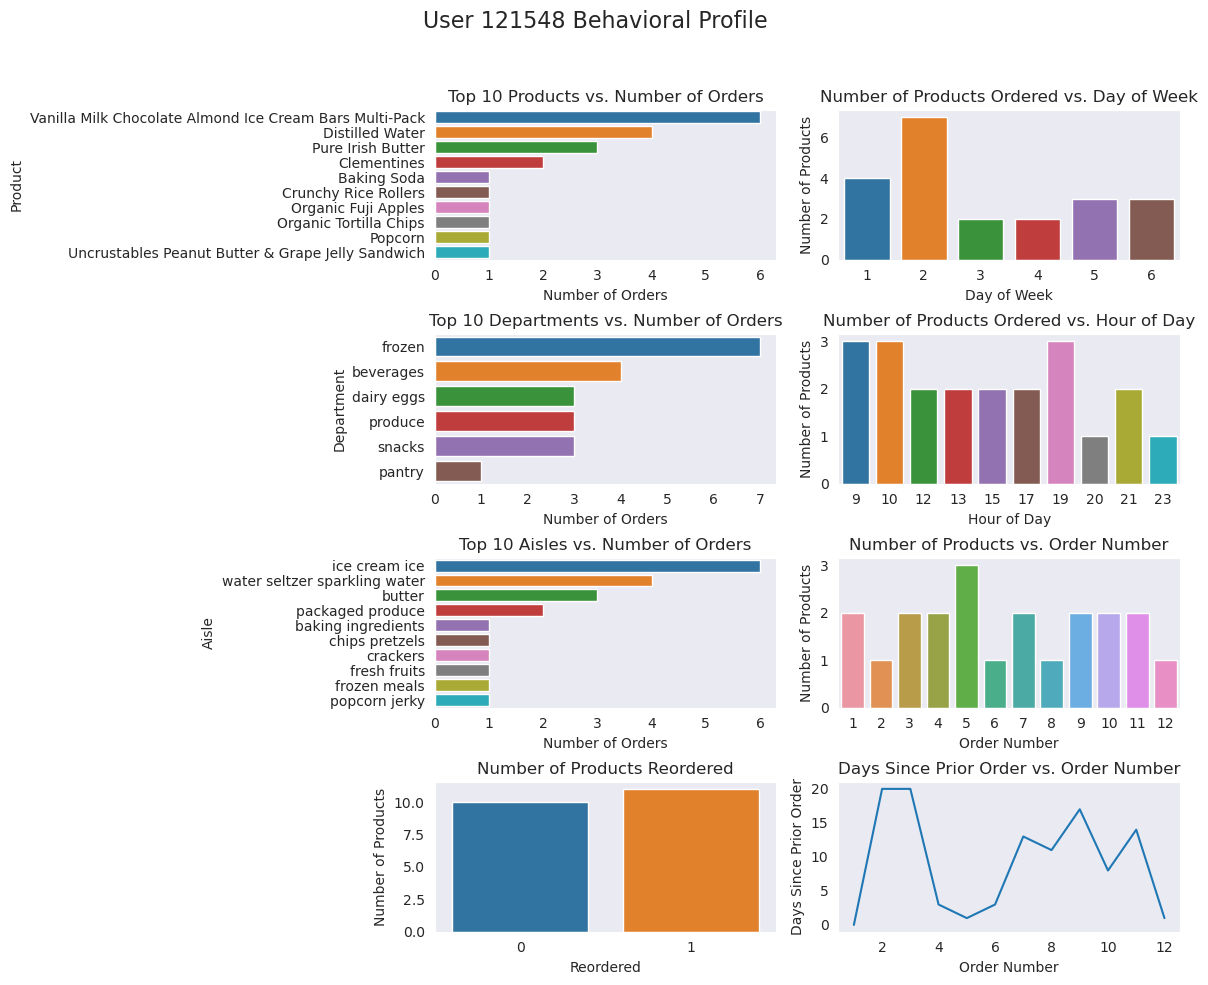

In [49]:
user_drill_down(121548)

---------- User 147532 Behavior Profile ----------
                                   User 147532
Total Orders Made                           39
Total Number of Products Ordered           656
Total Number of Reordered Products         477
Top Product Ordered                     Banana
Average Cart Size                    16.820513
Average Time Between Orders           8.461538
Reorder Ratio                         2.664804
Reorder Probability                   0.727134 



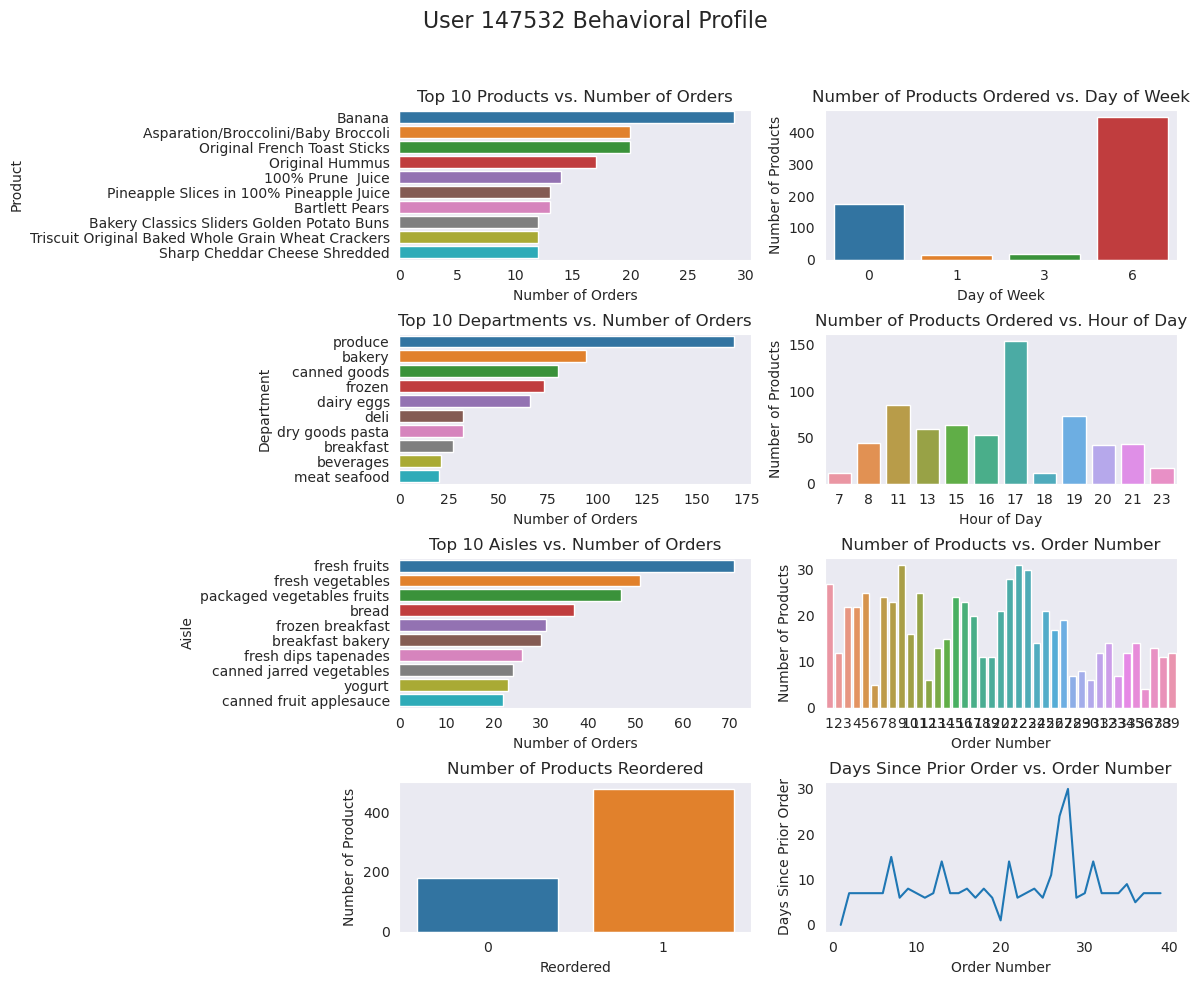

In [50]:
user_drill_down(147532)

---------- User 54400 Behavior Profile ----------
                                                          User 54400
Total Orders Made                                                 50
Total Number of Products Ordered                                 636
Total Number of Reordered Products                               430
Top Product Ordered                 Dark Italian Roast Ground Coffee
Average Cart Size                                              12.72
Average Time Between Orders                                     7.26
Reorder Ratio                                               2.087379
Reorder Probability                                         0.676101 



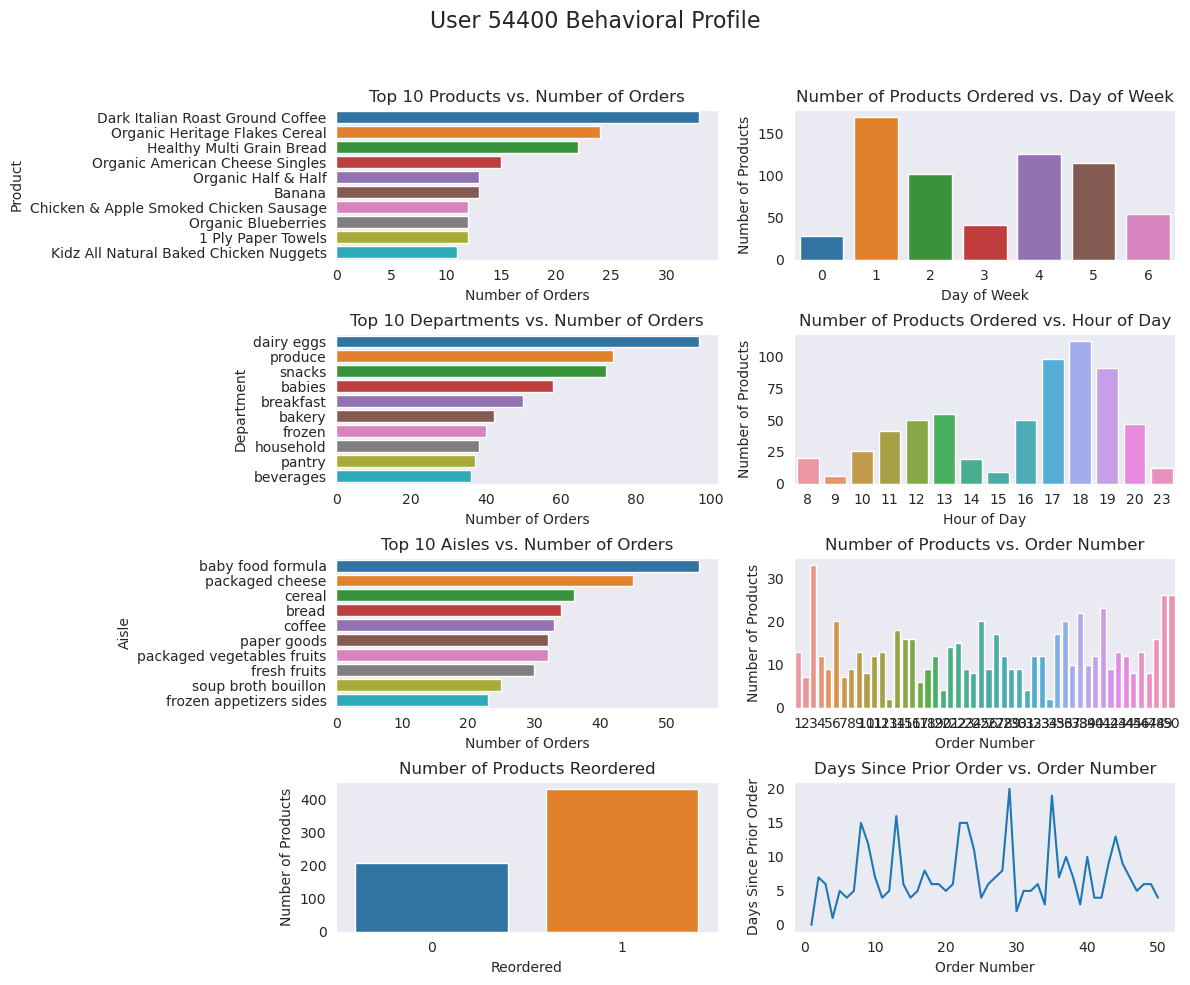

In [51]:
user_drill_down(54400)

# Distribution of Total Number of Orders by Users

In [52]:
# The total amount of orders made by each user
tot_orders_count = instacart_data_full.groupby('user_id')['order_number'].max()

# Let's look at the minimum and maximum amount of orders made by all users
min_user_orders = tot_orders_count.min()
max_user_orders = tot_orders_count.max()

print('Minimum total orders per user: ', min_user_orders)
print('Maximum total orders per user: ', max_user_orders)

Minimum total orders per user:  3
Maximum total orders per user:  100


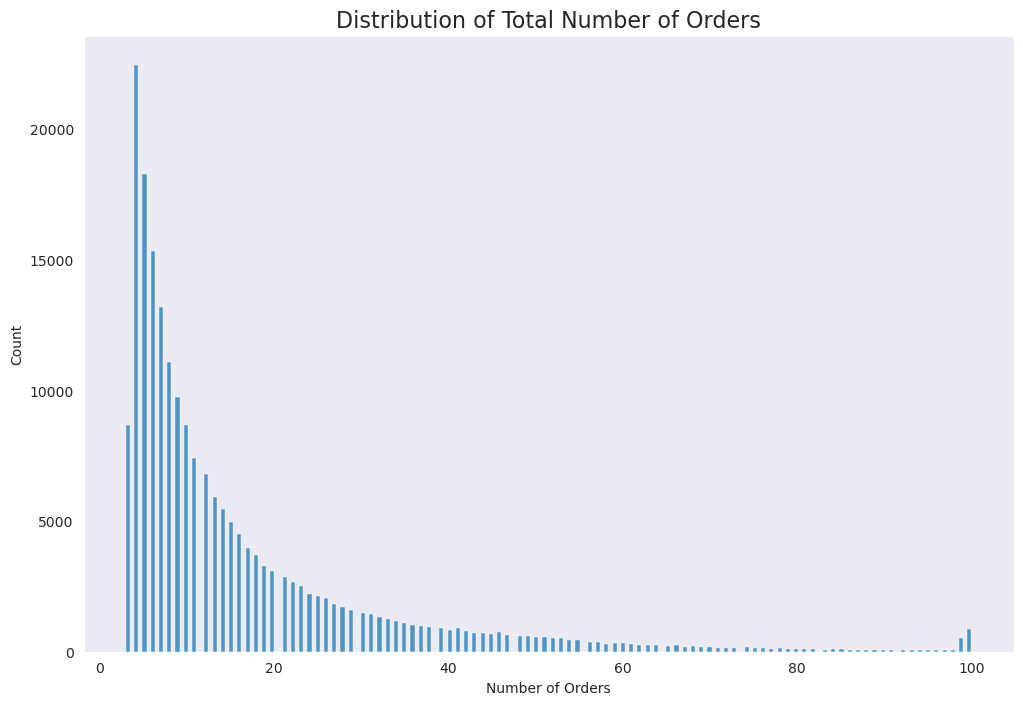

Average total orders per user:  16.0


In [53]:
# We'll plot the frequency of number of orders that each user made within our dataset
plt.figure(figsize=(12,8))
oc = sns.histplot(data=tot_orders_count)

# Titles
oc.set_title('Distribution of Total Number of Orders', fontsize=16)
oc.set_xlabel('Number of Orders')
plt.show()

avg_user_orders = tot_orders_count.mean().round()
print(f'Average total orders per user:  {avg_user_orders}')

We see that our distribution for the total number of orders made by each user is left skewed, with the average number of total orders per user being 16 orders.

# Distribution of Product Reordering by Users

Minumum number reordered products:  0
Maximum number reordered products:  3275


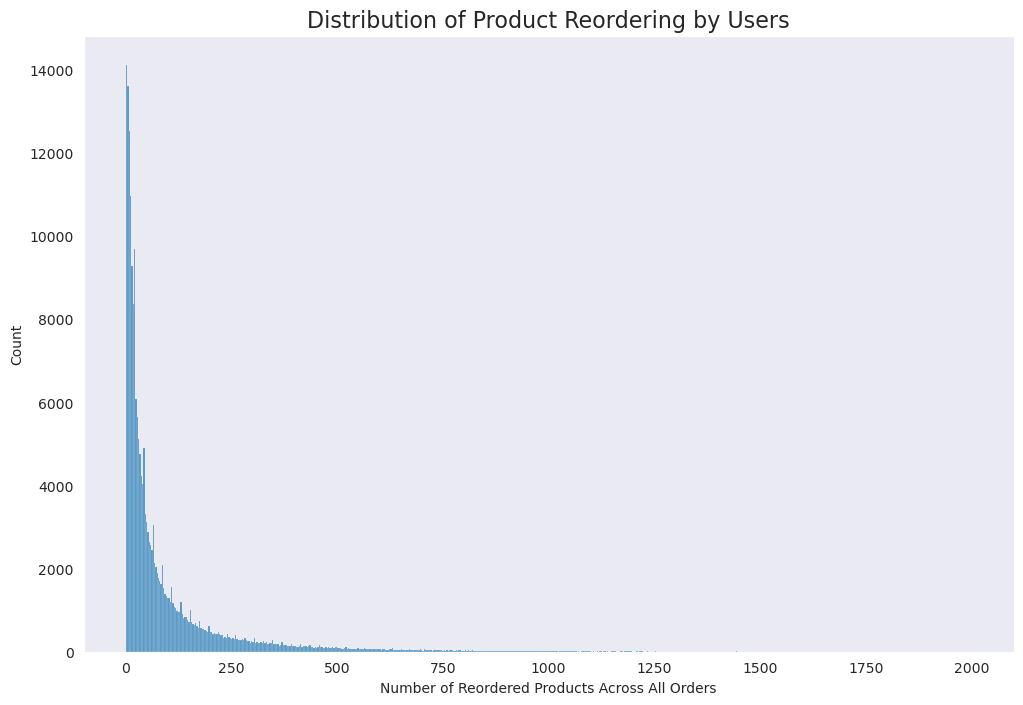

Average reordered products per user:  97.0


In [54]:
# Total amount of reordered products for each user
prod_reorders_count = instacart_data_full.groupby('user_id')['reordered'].sum()
print('Minumum number reordered products: ', prod_reorders_count.min())
print('Maximum number reordered products: ', prod_reorders_count.max())

plt.figure(figsize=(12,8))
prc = sns.histplot(data=prod_reorders_count, binrange=(0, 2000))

# Titles
prc.set_title('Distribution of Product Reordering by Users', fontsize=16)
prc.set_xlabel('Number of Reordered Products Across All Orders')
plt.show()

avg_prod_reorders = prod_reorders_count.mean().round()
print(f'Average reordered products per user:  {avg_prod_reorders}')

Our distribution for the total number of reordered products per user is left skewed, with the average number of reordered products being 97 products. 

# Cart Sizes

Minimum cart size:  1
Maximum cart size:  145


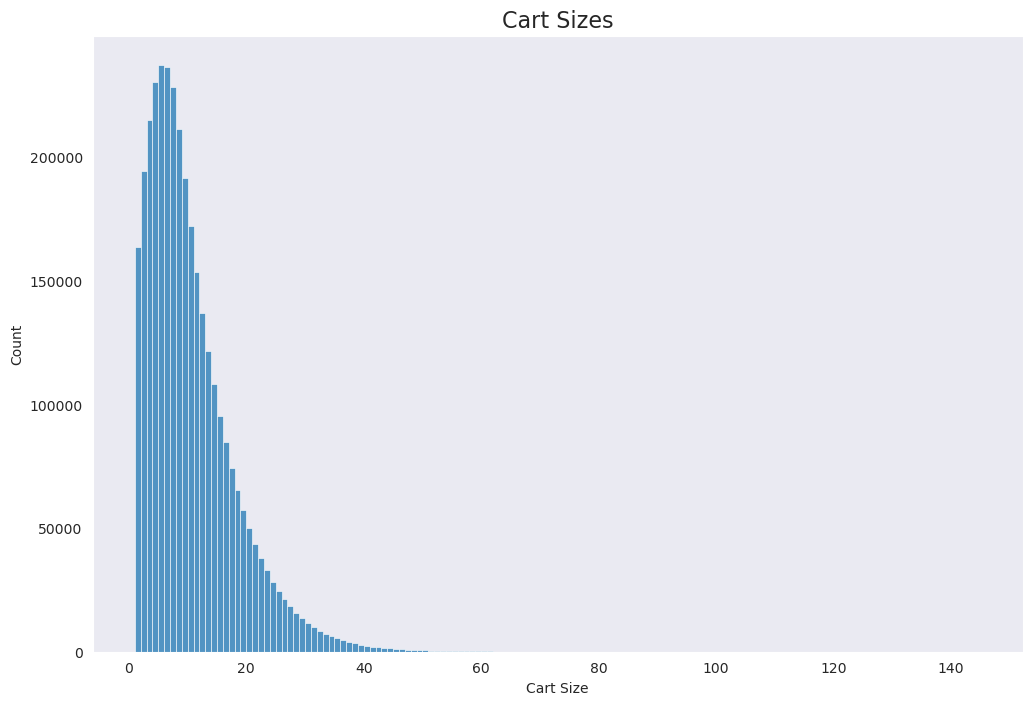

Average cart size:  10.0


In [55]:
# Cart size for each order
max_cart_size = instacart_data_full.groupby('order_id')['add_to_cart_order'].agg('max')
print(f'Minimum cart size:  {max_cart_size.min()}')
print(f'Maximum cart size:  {max_cart_size.max()}')

plt.figure(figsize=(12,8))
mcs = sns.histplot(data=max_cart_size, binwidth=1)

# Titles
mcs.set_title('Cart Sizes', fontsize=16)
mcs.set_xlabel('Cart Size')
plt.show()

avg_cart_size = max_cart_size.mean().round()
print(f'Average cart size:  {avg_cart_size}')

Our distribution for cart sizes is left skewed with the average cart size across all orders being 10 products. 

# Number of Orders by Day of Week

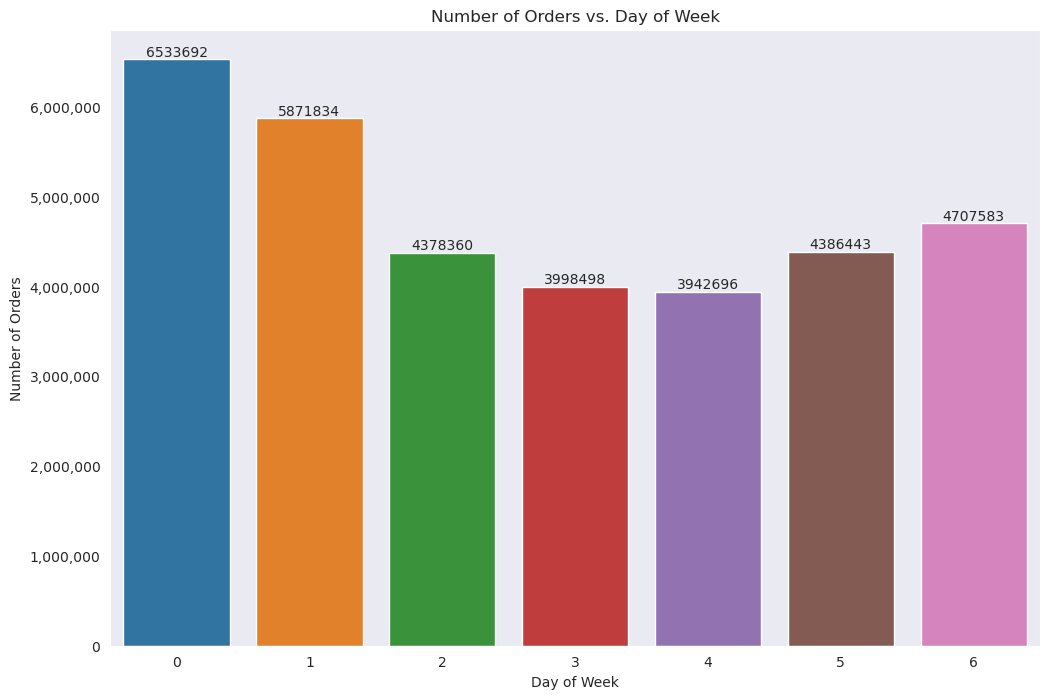

In [56]:
# Let's look at the total amount of orders made each day of the week in our datataset
days = instacart_data_full.groupby('order_dow')['order_dow'].count()

plt.figure(figsize=(12,8))
dow = sns.barplot(x=days.index,  y=days.values)

# Titles
dow.set_title('Number of Orders vs. Day of Week')
dow.set_ylabel('Number of Orders')
dow.set_xlabel('Day of Week')
dow.bar_label(dow.containers[0], fmt='%.0f')
plt.gca().yaxis.set_major_formatter('{x:,.0f}')

# Number of Orders by Hour of Day

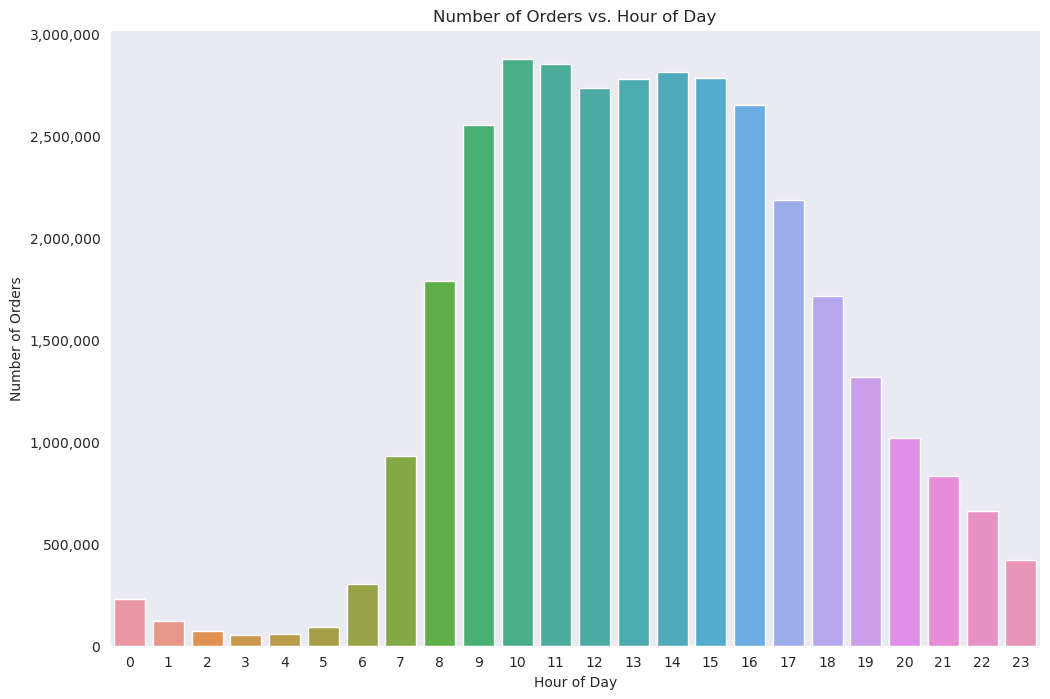

In [57]:
# Let's look at the number of orders made each hour of the day in our dataset
hours = instacart_data_full.groupby('order_hour_of_day').order_hour_of_day.count()

plt.figure(figsize=(12,8))
hours_counts = sns.barplot(x=hours.index,  y=hours.values)

# Titles
hours_counts.set_title('Number of Orders vs. Hour of Day')
hours_counts.set_ylabel('Number of Orders')
hours_counts.set_xlabel('Hour of Day')
plt.gca().yaxis.set_major_formatter('{x:,.0f}')

# Bivariate Analysis: Number of Orders by Day of Week and Hour of Day

Text(0.5, 58.7222222222222, 'Hour of Day')

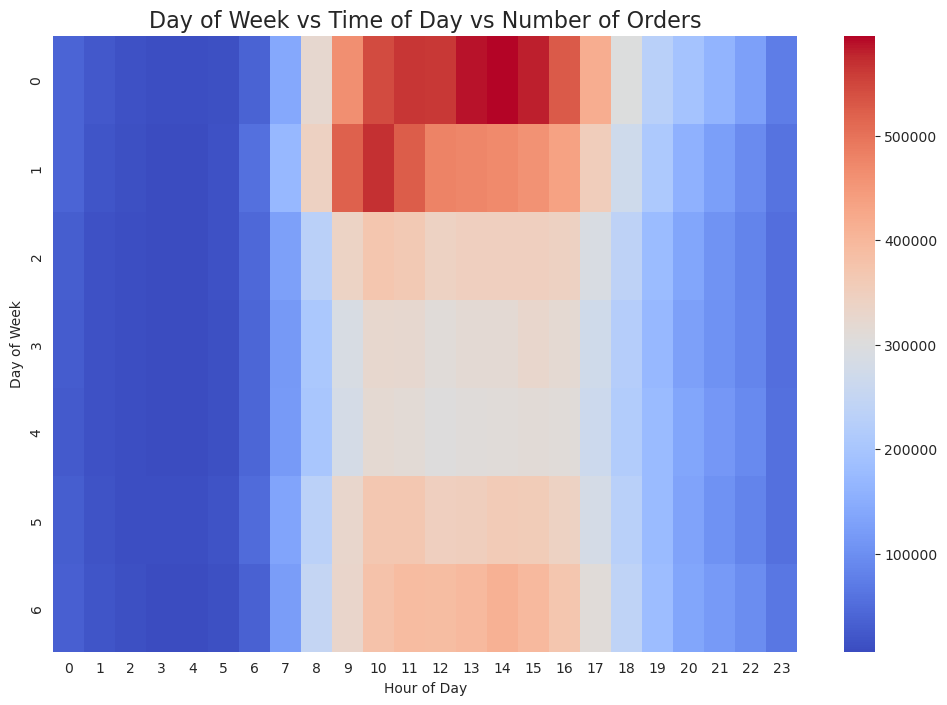

In [58]:
# And finally let's visualize the the amount of orders made each day during each hour
# with a bivariate heat map.

counts = instacart_data_full.groupby(['order_dow','order_hour_of_day'])['order_hour_of_day'].count()

dow_and_hour = instacart_data_full.groupby(['order_dow','order_hour_of_day']).count().reset_index()
dow_and_hour['counts'] = counts.to_list()

dow_and_hour = dow_and_hour.pivot('order_dow', 'order_hour_of_day', 'counts')

plt.figure(figsize=(12,8))
dh = sns.heatmap(dow_and_hour, cmap='coolwarm')

# Titles
dh.set_title('Day of Week vs Time of Day vs Number of Orders', fontsize=16)
dh.set_ylabel('Day of Week')
dh.set_xlabel('Hour of Day')

We can see that most orders within our dataset are made on Sunday and Monday between the hours of 9 am and 5 pm. 

# Probability of Reorder as a Function of Order Number

We'll also look at the relationship between order number and the probability that a user will reorder products, where:

$ P(Reordered) = \frac{\text{n order_number reordered } }{\text{n order_number not reordered + n order_number reordered}} $

Recall that our order_number feature has a slightly positive correlation with our reordered class (**r = 0.3036**). 

In [59]:
ord_num_reord_probability = instacart_data_full.groupby(['order_number', 'reordered'])['reordered'].count().groupby(level=0).apply(lambda x: x / float(x.sum())).reset_index(name='ord_num_reorder_probability')
ord_num_reord_probability

,order_number,reordered,ord_num_reorder_probability
0,1,0,1.000000
1,2,0,0.727639
2,2,1,0.272361
3,3,0,0.613718
4,3,1,0.386282
...,...,...,...
194,98,1,0.853232
195,99,0,0.158048
196,99,1,0.841952
197,100,0,0.140084


Text(0.5, 0, 'Order Number')

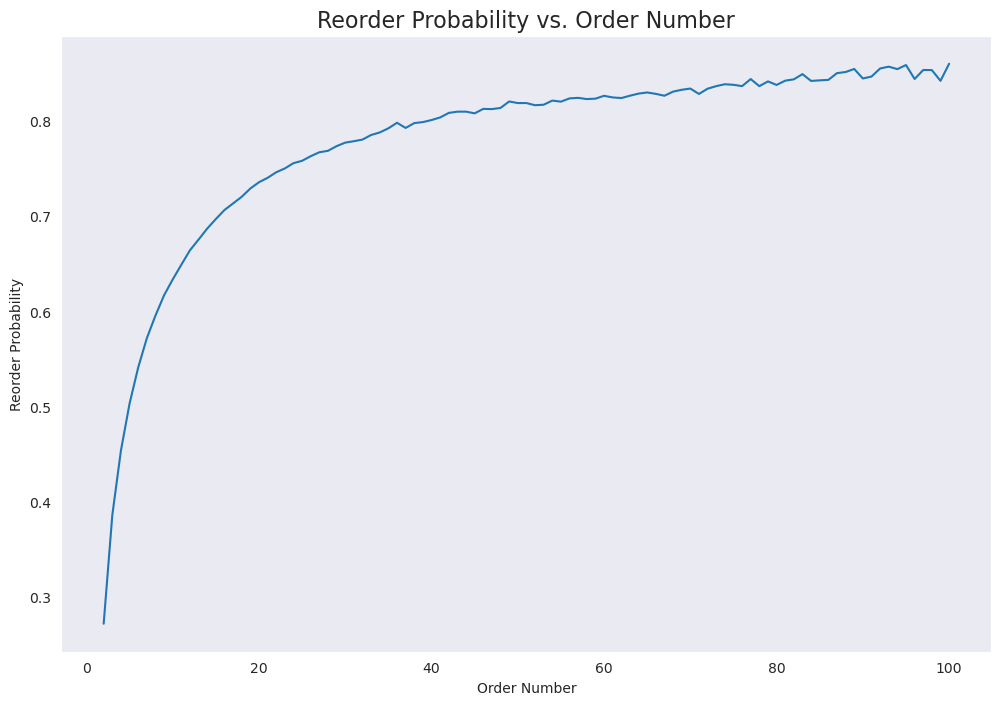

In [60]:
# Reorder Probability vs. Order Number
ord_num_reord_probability = ord_num_reord_probability[ord_num_reord_probability['reordered'] == 1]

# Conditional Probability Plot
plt.figure(figsize=(12,8))
sns.lineplot(data=ord_num_reord_probability, x='order_number', y='ord_num_reorder_probability')

# Titles
plt.title('Reorder Probability vs. Order Number', fontsize=16)
plt.ylabel('Reorder Probability')
plt.xlabel('Order Number')

**We can see that reorder probability does in fact increase steadily as the number of orders a user makes increases.** It appears that the more times a user places orders and gains experiences with products that they like, the more likely they are to place orders with reordered products in them.  

# Conclusions

Our Instacart dataset consists of 3,346,083 orders made by a total of 206,209 users across 49,685 products in 21 departments and 134 aisles.

We found that by far the most popular department that users placed orders from was "produce", with the most popular aisles being "fresh fruits" and "fresh vegetables", and the most popular product being "banana". We saw that a product's reorder probability will decrease steadily as a function of cart position as that product's cart position is increased from 1 to 50, with chaotic behavior in reorder probability occuring after cart position 50.

We also found that on average users made 10 orders total, with an average of 96 reordered products, and an average cart size of 10 products per order. Users placed most orders on Sunday and Monday between the hours of 9 am and 5 pm. Here we saw that reorder probability does increase as a function of order number as the amount of orders a user places increases.

The approach taken here has generally involved treating this dataset as a binary classification problem, where our class variable is the reordered feature. Further work with this dataset for modeling purposes will require feature engineering generating user, product, user x product, and time series features from this data. 